In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file into a pandas dataframe, specifying the encoding as 'cp1251' for Russian letters
df = pd.read_csv('/content/programs_by_year_df - programs_by_year_df.csv')

# Create a bar chart of the data
df.head()

,Unnamed: 0,kpkv,year,name_eng,name_ukr,m_1_plan,m_1_fact,m_1_nspend,m_2_plan,m_2_fact,...,m_10_plan,m_10_fact,m_10_nspend,m_11_plan,m_11_fact,m_11_nspend,m_12_plan,m_12_fact,m_12_nspend,Annual Plan
0,1468,0,2018,Everything,Усього,5.338556e+10,4.517317e+10,8.212385e+09,6.531892e+10,6.195262e+10,...,6.695138e+10,6.449282e+10,6.012300e+10,8.309013e+10,8.094828e+10,6.226486e+10,7.402389e+10,1.145597e+11,2.172908e+10,9.058930e+11
1,1469,0,2019,Everything,Усього,7.049835e+10,6.171392e+10,8.784429e+09,7.110072e+10,6.778561e+10,...,7.771645e+10,7.089366e+10,7.245509e+10,8.003905e+10,8.408688e+10,6.840727e+10,7.948140e+10,1.182666e+11,2.962208e+10,9.826015e+11
2,1470,0,2020,Everything,Усього,7.332585e+10,6.201529e+10,1.131055e+10,7.998727e+10,6.961282e+10,...,9.387599e+10,9.246914e+10,9.441188e+10,1.040490e+11,9.784484e+10,1.006161e+11,9.375146e+10,1.582431e+11,3.612447e+10,1.135333e+12
3,1471,0,2021,Everything,Усього,8.080578e+10,6.828806e+10,1.251772e+10,8.927378e+10,8.630206e+10,...,9.794926e+10,9.394642e+10,7.230844e+10,1.270531e+11,1.275120e+11,7.184949e+10,1.569902e+11,2.104696e+11,1.837009e+10,1.278194e+12
4,0,111010,2018,Implementation of legislative activity of the ...,Здійснення законотворчої діяльності Верховної ...,6.112110e+07,5.620453e+07,4.916567e+06,6.556050e+07,6.272266e+07,...,7.671230e+07,6.321621e+07,1.087207e+08,7.784000e+07,7.417090e+07,1.123898e+08,8.537820e+07,1.448637e+08,5.290437e+07,8.970665e+08


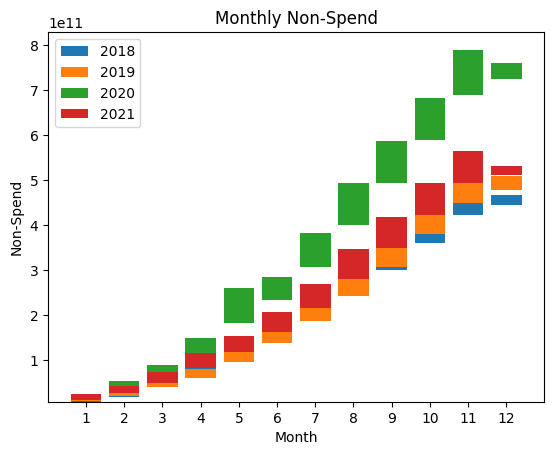

In [ ]:
months = range(1, 13)
years = sorted(df['year'].unique())

# Creating a stacked bar chart for each year separately
for year in years:
    nonspend = df[df['year']==year][[f'm_{i}_nspend' for i in months]].values[0]
    plt.bar(months, nonspend, bottom=np.cumsum(nonspend), label=str(year))

plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Non-Spend')
plt.title('Monthly Non-Spend')
plt.legend()
plt.show()

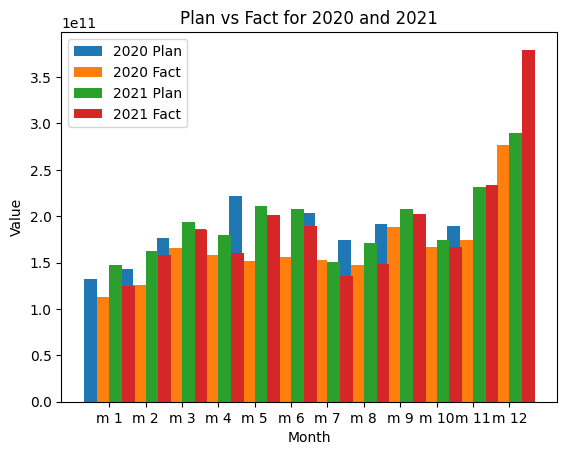

In [ ]:
# Group the data by year
grouped = df.groupby('year')

# Select the plan and fact columns for 2020 and 2021
plan_2020 = grouped.get_group(2020).filter(like='_plan').sum()
fact_2020 = grouped.get_group(2020).filter(like='_fact').sum()
plan_2021 = grouped.get_group(2021).filter(like='_plan').sum()
fact_2021 = grouped.get_group(2021).filter(like='_fact').sum()

# Create a bar chart that shows the plan and fact values for 2020 and 2021
fig, ax = plt.subplots()
x_labels = [col.replace('_plan', '').replace('_fact', '').replace('_', ' ') for col in plan_2020.index]
x_pos = [i for i, _ in enumerate(x_labels)]
bar_width = 0.35
ax.bar(x_pos, plan_2020, width=bar_width, label='2020 Plan')
ax.bar([pos + bar_width for pos in x_pos], fact_2020, width=bar_width, label='2020 Fact')
ax.bar([pos + 2*bar_width for pos in x_pos], plan_2021, width=bar_width, label='2021 Plan')
ax.bar([pos + 3*bar_width for pos in x_pos], fact_2021, width=bar_width, label='2021 Fact')
ax.set_xlabel('Month')
ax.set_ylabel('Value')
ax.set_title('Plan vs Fact for 2020 and 2021')
ax.set_xticks([pos + 1.5*bar_width for pos in x_pos])
ax.set_xticklabels(x_labels)
ax.legend()
plt.show()

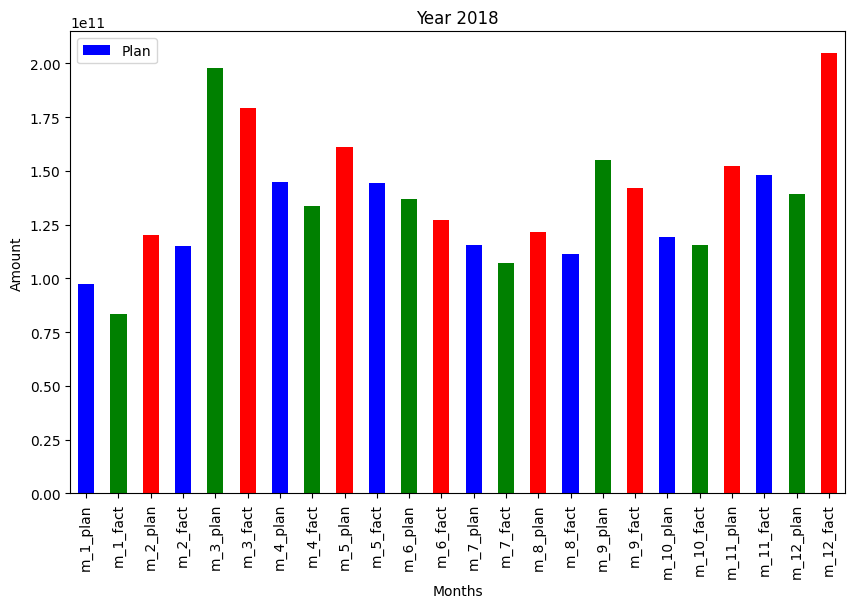

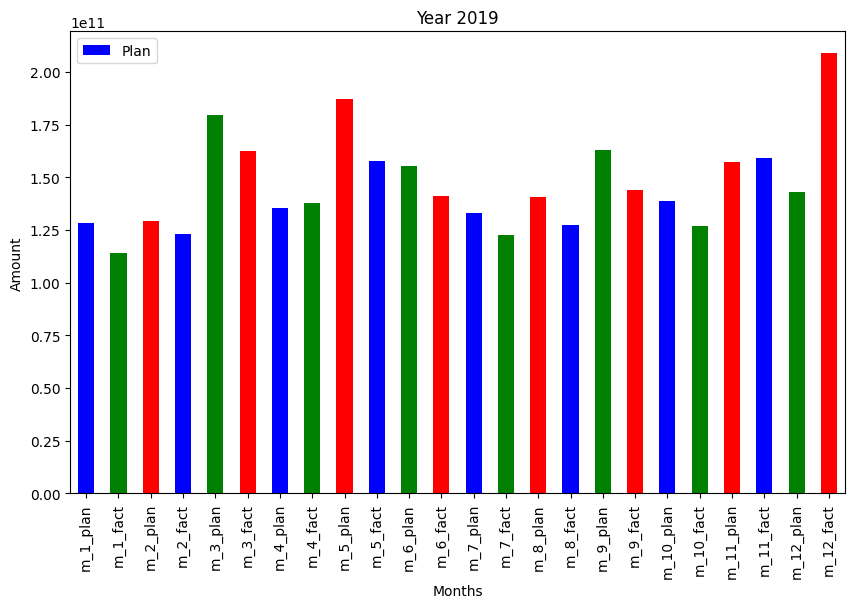

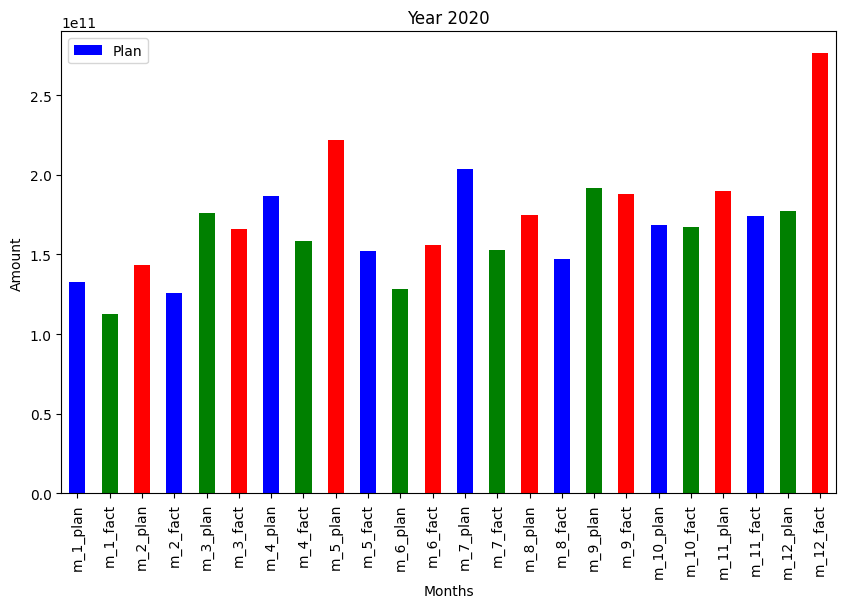

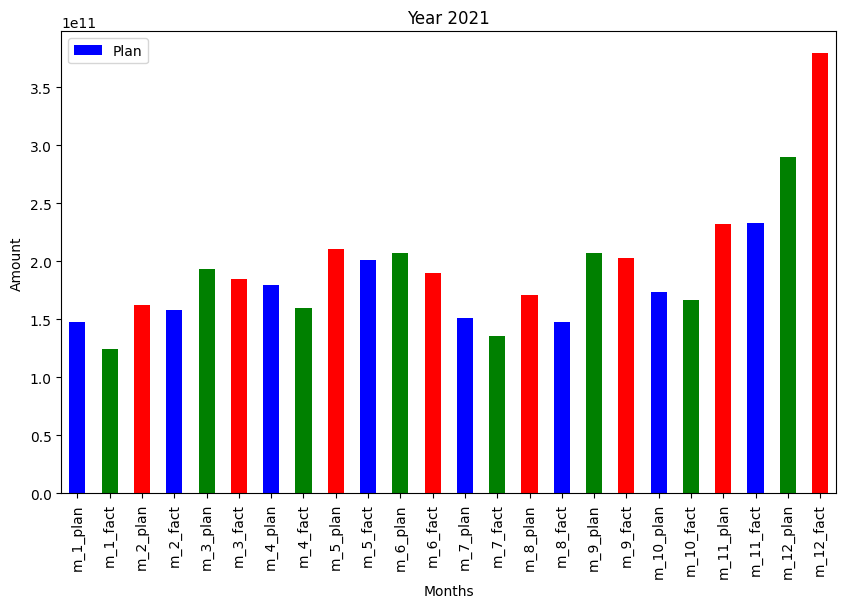

In [ ]:
# Select the rows for the years 2018 to 2021
years = [2018, 2019, 2020, 2021]
df_years = df[df['year'].isin(years)]

# Group the data by year and sum the values for plan, fact, and nspend
df_agg = df_years.groupby('year').agg({
    'm_1_plan': 'sum', 'm_1_fact': 'sum',
    'm_2_plan': 'sum', 'm_2_fact': 'sum',
    'm_3_plan': 'sum', 'm_3_fact': 'sum',
    'm_4_plan': 'sum', 'm_4_fact': 'sum',
    'm_5_plan': 'sum', 'm_5_fact': 'sum',
    'm_6_plan': 'sum', 'm_6_fact': 'sum',
    'm_7_plan': 'sum', 'm_7_fact': 'sum',
    'm_8_plan': 'sum', 'm_8_fact': 'sum',
    'm_9_plan': 'sum', 'm_9_fact': 'sum',
    'm_10_plan': 'sum', 'm_10_fact': 'sum',
    'm_11_plan': 'sum', 'm_11_fact': 'sum',
    'm_12_plan': 'sum', 'm_12_fact': 'sum',

})

# Transpose the data so that the columns become the index
df_agg = df_agg.T

# Create a bar chart for each year
for year in years:
    df_year = df_agg[year]
    ax = df_year.plot(kind='bar', color=['b', 'g', 'r'], figsize=(10,6))
    ax.set_title(f'Year {year}')
    ax.set_xlabel('Months')
    ax.set_ylabel('Amount')
    ax.legend(['Plan', 'Fact', 'NSpend'])
    plt.show()

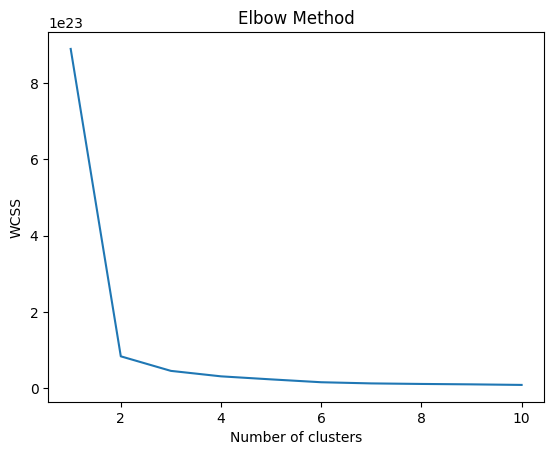

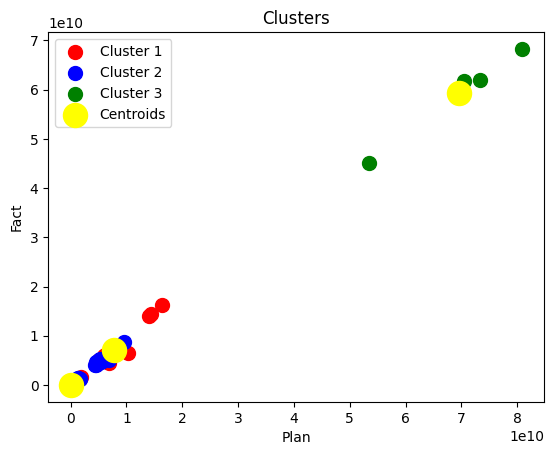

In [ ]:
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
# select the columns to use for clustering

plan_data = df.loc[:, 'm_1_plan':'m_12_plan']

X_imputed = df.iloc[:, 5:17].values

# create an instance of SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='constant', fill_value=0)

# impute missing values with the mean of the respective column
X_imputed = imputer.fit_transform(plan_data)

# determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_imputed)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# perform the clustering
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_imputed)

# visualize the clusters
plt.scatter(X_imputed[y_kmeans == 0, 0], X_imputed[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_imputed[y_kmeans == 1, 0], X_imputed[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_imputed[y_kmeans == 2, 0], X_imputed[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters')
plt.xlabel('Plan')
plt.ylabel('Fact')
plt.legend()
plt.show()

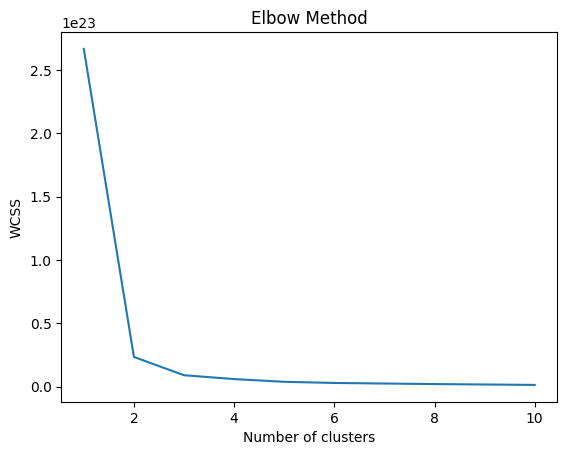

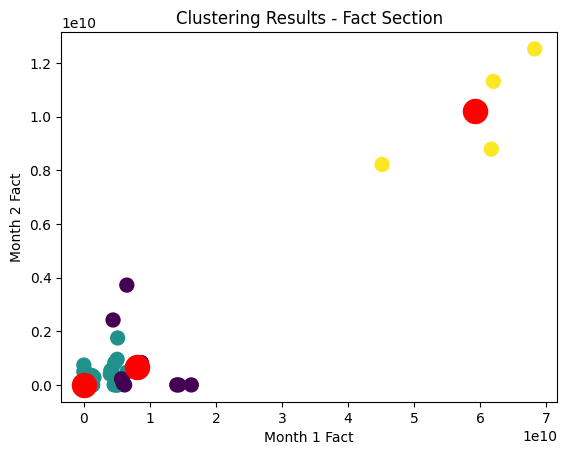

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Replace missing values with 0
df.fillna(0, inplace=True)

# Select only the columns for the "fact" section
X = df.iloc[:, 6:18]

# Create an elbow plot to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Fit the KMeans model with the optimal number of clusters
n_clusters = 3  # set the optimal number of clusters based on the elbow plot
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualize the clusters in 2D
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=100, c=y_kmeans)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title('Clustering Results - Fact Section')
plt.xlabel('Month 1 Fact')
plt.ylabel('Month 2 Fact')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)
# Train a KMeans model on the training data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(train_df.filter(like='_fact'))

# Make predictions for the test data
test_pred = kmeans.predict(test_df.filter(like='_fact'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

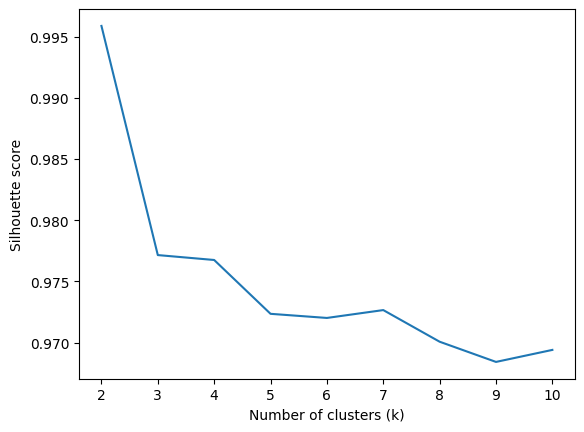

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Fill in missing values with 0
train_df.fillna(0, inplace=True)

# Try different values of k
k_values = range(2, 11)
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_df.filter(like='_fact'))
    labels = kmeans.labels_
    score = silhouette_score(train_df.filter(like='_fact'), labels)
    silhouette_scores.append(score)

# Plot the silhouette scores vs k
plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


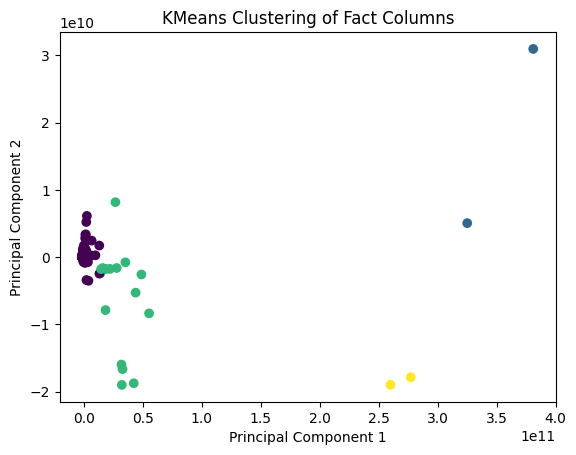

In [ ]:
from sklearn.decomposition import PCA

# Fill in missing values with 0
train_df.fillna(0, inplace=True)

# Train a KMeans model on the training data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(train_df.filter(like='_fact'))

# Perform PCA on the fact columns of the training data
pca = PCA(n_components=2)
pca.fit(train_df.filter(like='_fact'))
pca_train = pca.transform(train_df.filter(like='_fact'))

# Plot the clusters in 2D space
plt.scatter(pca_train[:, 0], pca_train[:, 1], c=kmeans.labels_)
plt.title('KMeans Clustering of Fact Columns')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df.fillna(0, inplace=True)
test_df.fillna(0, inplace=True)
# Train a KMeans model on the training data
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(train_df.filter(like='_plan'))

# Make predictions for the test data
test_pred = kmeans.predict(test_df.filter(like='_plan'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

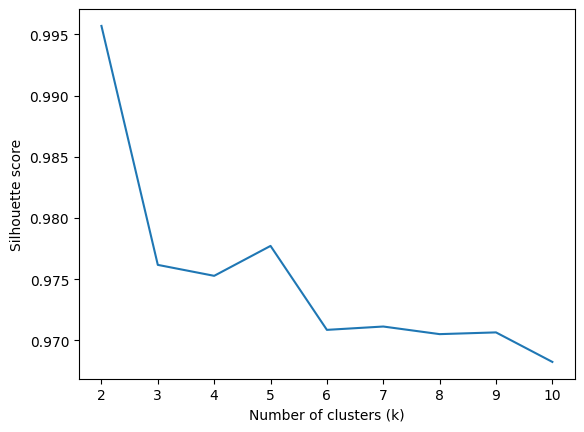

In [ ]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Fill in missing values with 0
train_df.fillna(0, inplace=True)

# Try different values of k
k_values = range(2, 11)
silhouette_scores = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(train_df.filter(like='_plan'))
    labels = kmeans.labels_
    score = silhouette_score(train_df.filter(like='_plan'), labels)
    silhouette_scores.append(score)

# Plot the silhouette scores vs k
plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


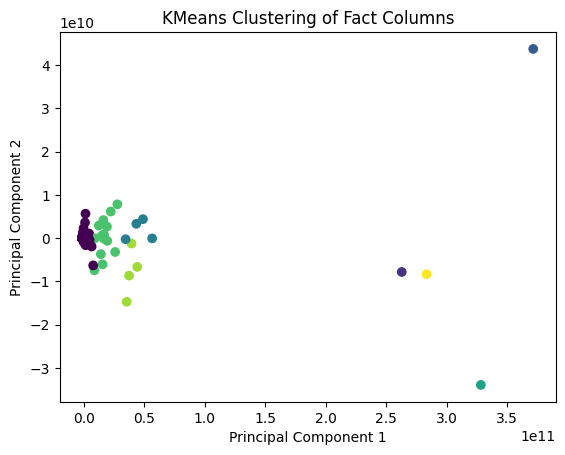

In [ ]:
from sklearn.decomposition import PCA

# Fill in missing values with 0
train_df.fillna(0, inplace=True)

# Train a KMeans model on the training data
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(train_df.filter(like='_plan'))

# Perform PCA on the fact columns of the training data
pca = PCA(n_components=2)
pca.fit(train_df.filter(like='_plan'))
pca_train = pca.transform(train_df.filter(like='_plan'))

# Plot the clusters in 2D space
plt.scatter(pca_train[:, 0], pca_train[:, 1], c=kmeans.labels_)
plt.title('KMeans Clustering of Fact Columns')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
#Data Preparation
#Feature Selection
#Model Design
#Model Training
#Model Testing

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Remove non-numeric columns
df = df.select_dtypes(include=[np.number])

# Split dataset into features and target
X = df.drop(columns=['Annual Plan'])
y = df['Annual Plan']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Create a neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)

# Test the model
predictions = model.predict(X_test)

# Compare predictions with actual values
for pred, actual in zip(predictions.flatten(), y_test):
    print(f"Predicted: {pred:.2f}, Actual: {actual:.2f}")

Epoch 1/100
50/50 [==============================] - 1s 2ms/step - loss: 3129950794051710091264.0000
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 3129950794051710091264.0000
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 3129950794051710091264.0000
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 3129951357001663512576.0000
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 3129950231101756669952.0000
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 3129950231101756669952.0000
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 3129951638476640223232.0000
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 3129951638476640223232.0000
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 3129951357001663512576.0000
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 31299507940517100

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler


df.fillna(0, inplace=True)

# Feature Selection
# Select plan columns and year column
plan_columns = [f"m_{i}_plan" for i in range(1, 13)]
features = df[["year"] + plan_columns]

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)


# Prepare the input and output data for the model
X = scaled_data[:, 0:1]  # year
y = scaled_data[:, 1:]  # monthly plan data

# Split the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Design
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(12, activation='linear')
])

# Model Training
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Model Testing
model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)
# To convert the predictions back to the original scale, use the inverse_transform method
predictions = scaler.inverse_transform(np.concatenate((X_test, predictions), axis=1))[:, 1:]

Epoch 1/50
40/40 [==============================] - 2s 17ms/step - loss: 1.3728 - mae: 0.1280 - val_loss: 1.5371 - val_mae: 0.2087
Epoch 2/50
40/40 [==============================] - 0s 5ms/step - loss: 1.3723 - mae: 0.1769 - val_loss: 1.5377 - val_mae: 0.2059
Epoch 3/50
40/40 [==============================] - 0s 4ms/step - loss: 1.3700 - mae: 0.1669 - val_loss: 1.5389 - val_mae: 0.1902
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 1.3713 - mae: 0.1381 - val_loss: 1.5391 - val_mae: 0.1930
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 1.3721 - mae: 0.1502 - val_loss: 1.5399 - val_mae: 0.1835
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 1.3711 - mae: 0.1465 - val_loss: 1.5411 - val_mae: 0.1834
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 1.3708 - mae: 0.1486 - val_loss: 1.5390 - val_mae: 0.1936
Epoch 8/50
40/40 [==============================] - 0s 3ms/step - loss: 1.3707 - mae: 0.1

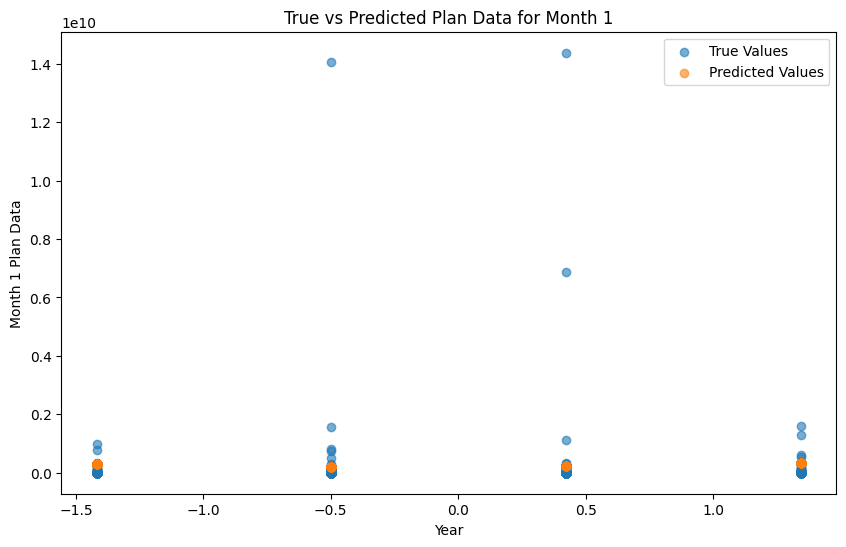

In [ ]:
import matplotlib.pyplot as plt
# Just put in another index for another month

# Select a specific month to visualize, for example, January
month_index = 0  # 0 for January, 1 for February, ..., 11 for December

# Extract true values and predictions for the selected month
true_values = scaler.inverse_transform(np.concatenate((X_test, y_test), axis=1))[:, month_index+1]
predicted_values = predictions[:, month_index]

# Create a scatter plot to visualize the true values and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], true_values, label="True Values", alpha=0.6)
plt.scatter(X_test[:, 0], predicted_values, label="Predicted Values", alpha=0.6)

plt.xlabel("Year")
plt.ylabel(f"Month {month_index+1} Plan Data")
plt.title(f"True vs Predicted Plan Data for Month {month_index+1}")
plt.legend()
plt.show()

In [ ]:
df.fillna(0, inplace=True)

# Feature Selection
# Select plan columns and year column
plan_columns = [f"m_{i}_fact" for i in range(1, 13)]
features = df[["year"] + plan_columns]

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)


# Prepare the input and output data for the model
X = scaled_data[:, 0:1]  # year
y = scaled_data[:, 1:]  # monthly plan data

# Split the dataset into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Model Design
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(12, activation='linear')
])

# Model Training
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Model Testing
model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)
# To convert the predictions back to the original scale, use the inverse_transform method
predictions = scaler.inverse_transform(np.concatenate((X_test, predictions), axis=1))[:, 1:]

Epoch 1/50
40/40 [==============================] - 1s 7ms/step - loss: 1.3634 - mae: 0.1401 - val_loss: 1.5733 - val_mae: 0.1855
Epoch 2/50
40/40 [==============================] - 0s 3ms/step - loss: 1.3617 - mae: 0.1292 - val_loss: 1.5729 - val_mae: 0.1847
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 1.3597 - mae: 0.1509 - val_loss: 1.5713 - val_mae: 0.2017
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 1.3612 - mae: 0.1681 - val_loss: 1.5724 - val_mae: 0.1910
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 1.3593 - mae: 0.1574 - val_loss: 1.5725 - val_mae: 0.1976
Epoch 6/50
40/40 [==============================] - 0s 3ms/step - loss: 1.3597 - mae: 0.1540 - val_loss: 1.5724 - val_mae: 0.1974
Epoch 7/50
40/40 [==============================] - 0s 3ms/step - loss: 1.3597 - mae: 0.1533 - val_loss: 1.5721 - val_mae: 0.2022
Epoch 8/50
40/40 [==============================] - 0s 4ms/step - loss: 1.3596 - mae: 0.15

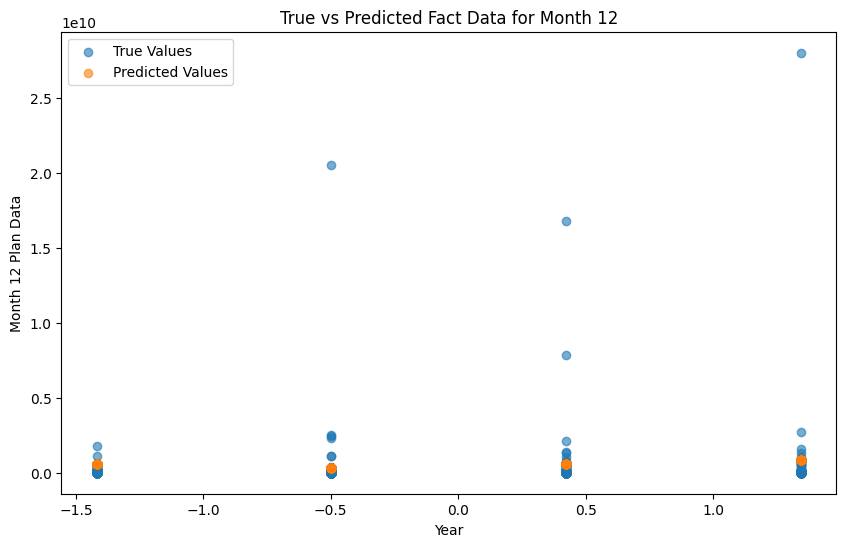

In [ ]:
import matplotlib.pyplot as plt
# Just put in another index for another month

# Select a specific month to visualize, for example, January
month_index = 1  # 0 for January, 1 for February, ..., 11 for December

# Extract true values and predictions for the selected month
true_values = scaler.inverse_transform(np.concatenate((X_test, y_test), axis=1))[:, month_index+1]
predicted_values = predictions[:, month_index]

# Create a scatter plot to visualize the true values and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(X_test[:, 0], true_values, label="True Values", alpha=0.6)
plt.scatter(X_test[:, 0], predicted_values, label="Predicted Values", alpha=0.6)

plt.xlabel("Year")
plt.ylabel(f"Month {month_index+1} Plan Data")
plt.title(f"True vs Predicted Fact Data for Month {month_index+1}")
plt.legend()
plt.show()